In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
#DECISION TREES

In [ ]:
gcredit = pd.read_csv("GermanCredit.csv.zip")
gcredit.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
y = pd.DataFrame(data=gcredit["Class"], columns=["Class"]).values
X = gcredit.drop("Class", axis=1).values

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
Y = pd.DataFrame(ytrain)
Ym = Y.mask(Y == 'Good', 1)
Ym = Ym.mask(Ym == 'Bad', 0)
Ym = list(Ym[0])

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [ ]:
grid_search_cv.fit(Xtrain, Ym)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.4s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=12, random_state=42)

In [ ]:
grid_search_cv.best_score_

0.7053333333333333

In [ ]:
Y = pd.DataFrame(ytest)
Yt = Y.mask(Y == 'Good', 1)
Yt = Yt.mask(Yt == 'Bad', 0)
Yt = list(Yt[0])
print("Testing Score")
print(grid_search_cv.score(Xtest, Yt))

Testing Score
0.732


In [ ]:
#RANDOM FORESTS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
random_forest.fit(Xtrain, Ym)

RandomForestClassifier(random_state=42)

In [ ]:
print("Testing Score")
print(random_forest.score(Xtest, Yt))

Testing Score
0.752


In [ ]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

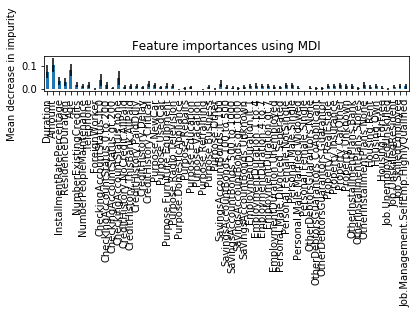

In [ ]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=gcredit.drop("Class", axis=1).columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
pdp_set = gcredit
classmask = pdp_set['Class']
classmask = classmask.mask(classmask == 'Good', 1)
classmask = classmask.mask(classmask == 'Bad', 0)
pdp_set['Class'] = classmask
pdp_set.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,0,1,0,0,1,0,0,1,0


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


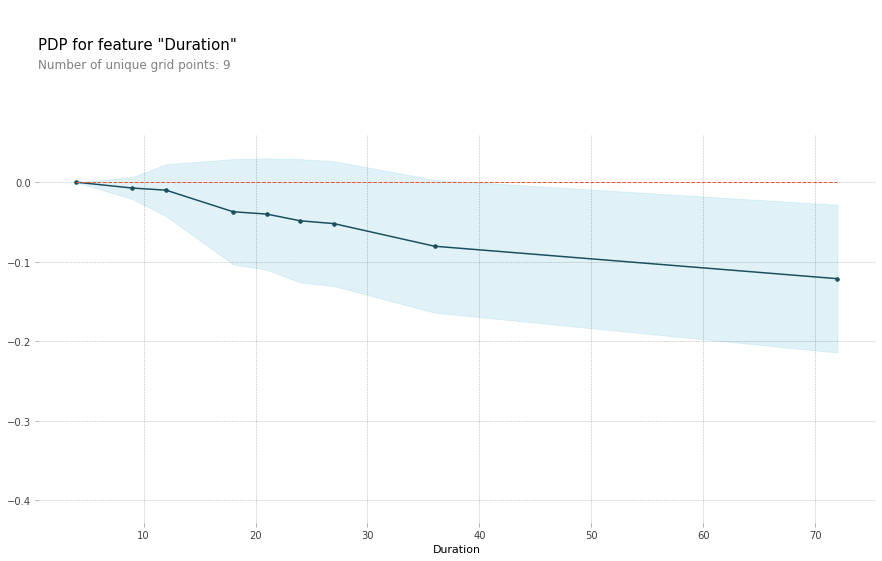

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
pdp_dur = pdp.pdp_isolate(
    model=random_forest, dataset=pdp_set, model_features=gcredit.drop("Class", axis=1).columns, feature='Duration'
)
fig, axes = pdp.pdp_plot(pdp_dur, 'Duration')

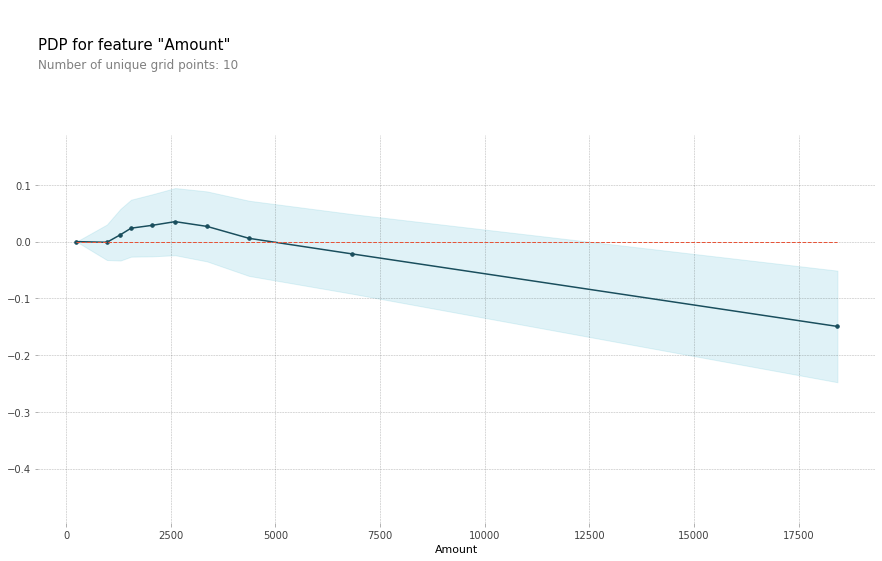

In [ ]:
pdp_amo = pdp.pdp_isolate(
    model=random_forest, dataset=pdp_set, model_features=gcredit.drop("Class", axis=1).columns, feature='Amount'
)
fig, axes = pdp.pdp_plot(pdp_amo, 'Amount')

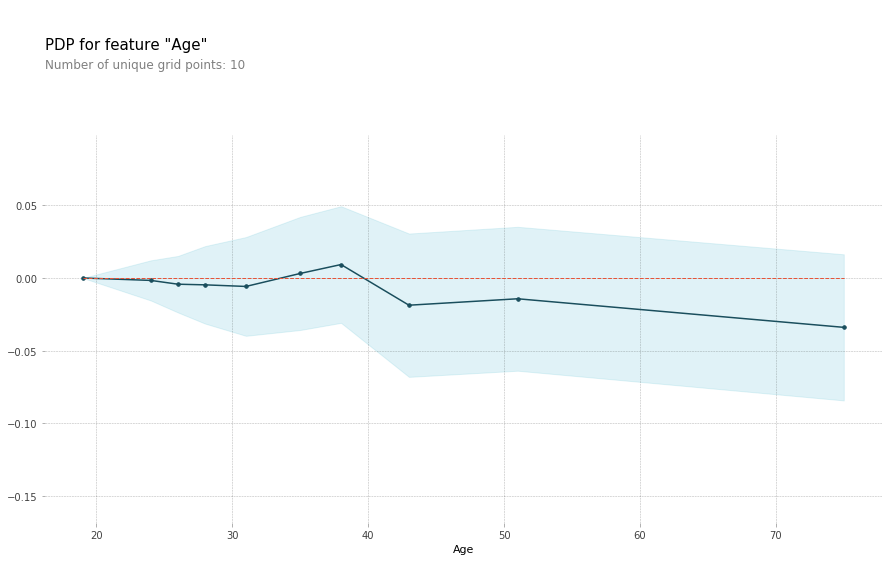

In [ ]:
pdp_age = pdp.pdp_isolate(
    model=random_forest, dataset=pdp_set, model_features=gcredit.columns[0:-1], feature='Age'
)
fig, axes = pdp.pdp_plot(pdp_age, 'Age')

In [ ]:
# BOOSTING

In [ ]:
# XGBOOST
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
dtrain = xgb.DMatrix(Xtrain, label=Ym, feature_names=gcredit.drop("Class", axis=1).columns)
dtest = xgb.DMatrix(Xtest, label=Yt, feature_names=gcredit.drop("Class", axis=1).columns)
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 10
model = XGBClassifier()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
predictions = [value for value in y_pred]
accuracy = accuracy_score(ytest, predictions)
print("XGBoost Score: " + str(accuracy))

XGBoost Score: 0.76


In [ ]:
# CATBOOST
from catboost import CatBoostClassifier, Pool
test_data = Pool(Xtest, ytest)
model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
model.fit(Xtrain, ytrain)
preds_class = model.score(test_data)
print("Catboost Score: " + str(preds_class))

0:	learn: 0.5708265	total: 2.89ms	remaining: 2.89ms
1:	learn: 0.5348399	total: 3.98ms	remaining: 0us
Catboost Score: 0.732


In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(Xtrain, label=Ym)
test_data = lgb.Dataset(Xtest, label=Yt)
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']
num_round = 10
bst = lgb.train(param, train_data, num_round)
y_pred = model.predict(Xtest)
predictions = [value for value in y_pred]
accuracy = accuracy_score(ytest, predictions)
print("LightGBM Score: " + str(accuracy))

[LightGBM] [Info] Number of positive: 523, number of negative: 227
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.697333 -> initscore=0.834631
[LightGBM] [Info] Start training from score 0.834631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes